In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import random
%matplotlib inline
import re
import warnings
import math
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
#Notes/idead/thoughts

# success rate of gpu's
# what does job termination mean - lose work? means that calculating time is important
#requested jobs used time and terminated -why a buffer
#......................................................
#failures by user - who and not completeing - using a lot of resources 
#failed jobs - bad users or hardware failure (exitcode)
#envoriment side  -- first value user - exitcode, second environment 

#'0:9 and 0:15 are the most common exit codes for jobs with some version of the state of "CANCELLED"

#asking for enough memory/types of failures
#asking too much memory

In [3]:
warnings.filterwarnings(action='ignore', category= FutureWarning)

In [4]:
accre = pd.read_csv('accre-gpu-jobs-2022-v2.csv', on_bad_lines='skip')
#accre

In [5]:
accre = pd.DataFrame(accre)
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED


In [6]:
accre['USEDMEM'] = accre['USEDMEM'].str.replace(r'[a-zA-Z]','')

In [7]:
accre['REQTIME'] = accre['REQTIME'].astype(str)
accre['USEDTIME'] = accre['USEDTIME'].astype(str)
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME'].str.replace('-',' days '))
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME'].str.replace('-',' days '))
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME'], unit = 'S')
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME'], unit = 'S')
accre = accre[accre['USEDMEM'].map(len) > 1]
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,2 days 00:00:00,0 days 00:13:13,1,2,1,pascal,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32,0 days 05:00:00,0 days 00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,0 days 20:00:00,0 days 05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,0 days 15:00:00,0 days 04:11:10,1,1,1,pascal,0:0,COMPLETED
5,32880721,glasshouse,brady,403.40,3 days 12:00:00,0 days 18:49:36,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,5 days 00:00:00,0 days 00:00:52,1,1,1,turing,0:0,COMPLETED
336934,46753820_26,harovin,porsha,5093.70,5 days 00:00:00,0 days 00:34:51,1,6,1,turing,0:0,COMPLETED
336936,46753823,harovin,shannon,156.21,5 days 00:00:00,0 days 00:04:03,1,1,1,turing,0:0,COMPLETED
336942,46754095,harovin,shannon,2820.52,5 days 00:00:00,0 days 00:11:13,1,1,1,turing,0:0,COMPLETED


In [8]:
accre[['USEDMEM']] = accre[['USEDMEM']].astype(float).astype(int)
accre.describe()

,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS
count,278200.000000,278200,278200,278200.000000,278200.000000,278200.000000
mean,2314.011377,0 days 23:59:14.920848310,0 days 01:40:06.459230769,1.005424,1.713896,1.087689
std,6710.613698,1 days 11:35:19.790342513,0 days 10:02:21.034831564,0.126344,1.787678,0.850298
min,0.000000,0 days 00:01:00,0 days 00:00:00,1.000000,1.000000,1.000000
25%,13.000000,0 days 10:00:00,0 days 00:00:36,1.000000,1.000000,1.000000
50%,1200.000000,0 days 10:00:00,0 days 00:03:21,1.000000,1.000000,1.000000
75%,2241.000000,0 days 12:00:00,0 days 00:09:24,1.000000,2.000000,1.000000
max,371247.000000,15 days 00:00:00,9 days 23:59:54,15.000000,120.000000,60.000000


In [ ]:
accre_almonds = accre[accre['ACCOUNT'] == 'almonds']
acr_exit_almd_ufailed = accre_almonds.loc[accre_almonds['STATE'] == 'FAILED']
                                                                                #accre_apple['PARTITION'].value_counts()
                                                                                #11/186 #*1 maxwell, but complete, Failed 6, hazel =6 failer, 1=GPU
                                                                                #almonds = 197 - #turing
accre_almonds['USER'].value_counts()

In [16]:
ACCOUNT={'USER':['Hazel', 'Annetta', 'Christian', 'Dick', 'Corry', 
                  'Cleva', 'Diandra', 'Wyman', 'Demarcus'],
          'FAILED': [6, 0, 0, 0, 0, 9, 1, 1, 87]}
                 
Users = pd.DataFrame(ACCOUNT, columns=['USER', 'FAILED'])
       

In [57]:
c = ['gray', 'blue', 'blue']

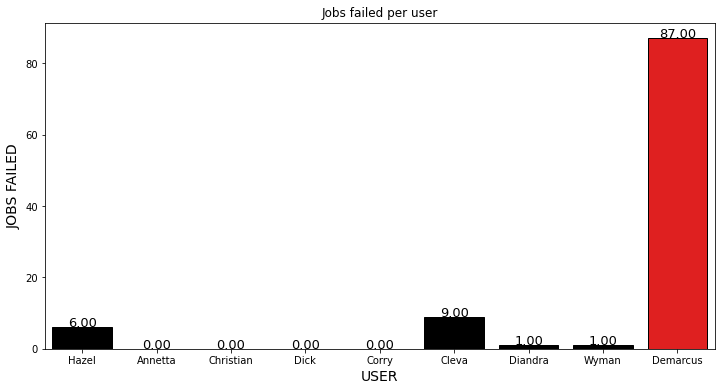

In [70]:
c = ['black', 'black', 'white', 'white', 'white', 'black', 'black', 'black','red']

plt.figure(figsize=(12,6))

plots = sns.barplot(x='USER', y='FAILED', data= Users, palette = c, edgecolor = 'black')

for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height()), ha = 'center', va = 'center',
                   size = 13, xytext = (0,4),
                   textcoords = 'offset points',
                  color = 'black')

plt.xlabel('USER', size = 14)

plt.ylabel('JOBS FAILED', size = 14)

plt.title('Jobs failed per user')

plt.show()

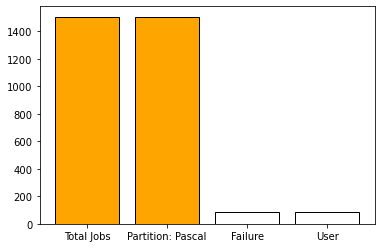

In [72]:
c= ['orange', 'orange', 'white', 'white']

data={'Total Jobs': 1505, 'Partition: Pascal': 1505, 'Failure': 87, 'User': 87}
names=list(data.keys())
values=list(data.values())

plt.bar(range(len(data)), values, tick_label=names, color = c, edgecolor='black')
plt.show()

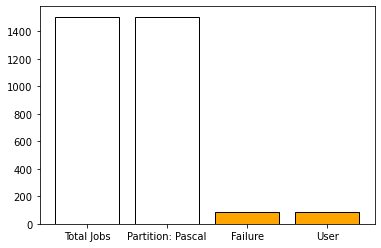

In [73]:
clr = ['white', 'white', 'orange', 'orange']


data={'Total Jobs': 1505, 'Partition: Pascal': 1505, 'Failure': 87, 'User': 87}
names=list(data.keys())
values=list(data.values())

plt.bar(range(len(data)), values, tick_label=names, color = clr, edgecolor='black')
plt.show()


In [74]:
accre_sunburst = accre[accre['ACCOUNT'] == 'sunburst']
acr_exit_sun_ufailed = accre_sunburst.loc[accre_sunburst['EXITCODE'] > '1']
#87/1505
#accre_sunburst['USEDMEM'].describe()

In [486]:
accre_sunburst = accre[accre['ACCOUNT'] == 'sunburst']
autm = accre_sunburst[['USEDTIME']]
arqtm = accre_sunburst[['REQTIME']]
acc_utm = autm[autm['USEDTIME'] > '1']
acc_rqtm = arqtm[arqtm['REQTIME'] > '1']
acc_utm_df = pd.DataFrame(acc_utm)
acc_rqtm_df = pd.DataFrame(acc_rqtm)
acc_time = acc_utm_df.join(acc_rqtm_df)
acc_time

,USEDTIME,REQTIME
65,0 days 00:05:33,4 days
66,0 days 00:05:28,4 days
67,0 days 00:04:53,4 days
68,0 days 00:40:41,4 days
69,0 days 01:08:56,4 days
...,...,...
333426,0 days 23:44:56,4 days
334421,2 days 12:22:49,4 days
334422,2 days 10:35:37,4 days
334423,2 days 12:16:38,4 days


In [29]:
accre_account_fail_pct = pd.DataFrame({'ACCOUNT': ['glasshouse', 'virginia', 'malanga',
              'prince', 'grisette', 'harovin',
              'sunburst', 'pasilla', 'plumcot',
              'pecans', 'kinnow', 'bertanne',
              'almonds', 'apple', 'cactus'],
              
              'PERCENT_FAIL': [accre_glasshouse_fail_pct, accre_virginia_fail_pct, accre_malanga_fail_pct,
               accre_prince_fail_pct, accre_grisette_fail_pct, accre_harovin_fail_pct,
               accre_sunburst_fail_pct, accre_pasilla_fail_pct, accre_plumcot_fail_pct,
               accre_pecans_fail_pct, accre_kinnow_fail_pct, accre_bertanne_fail_pct,
               accre_almonds_fail_pct, accre_apple_fail_pct, accre_cactus_fail_pct]})

<AxesSubplot:title={'center':'Failed Percentages for Accounts with 100+ Jobs'}, ylabel='ACCOUNT'>

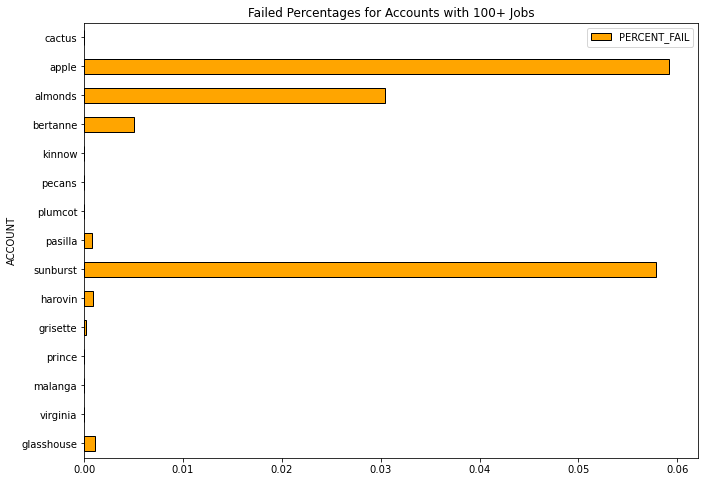

In [30]:
accre_account_fail_pct.set_index('ACCOUNT').plot(kind = 'barh', color = {'orange'}, edgecolor = 'black', figsize=(11,8), title = 'Failed Percentages for Accounts with 100+ Jobs')

In [ ]:
#accre_apple[['USEDMEM', 'REQTIME', 'USEDTIME', 'STATE', 'EXITCODE']].value_counts()
#accre_apple_time_diff = accre_apple['REQTIME'] - accre_apple['USEDTIME']
#accre_apple_time_diff.describe()
#accre_apple['USEDMEM'].astype(float).describe()
accre_apple['USEDMEM'].info()

Apple:
    
    Total Jobs: 186
    Failed: 11 (6%) 
    Completed: 44 (26%)
    Cancelled: 116 (62%) 
    Cancelled by 50355: 11 (6%) 
    Cancelled by 161909: 4 (2%)

Partition:
    
    Turing: 185 (99%)
    Maxwell: 1 (1%)
        
Used Memory:
    
    Total Use: 2.9 KB
    Average: 5649.704785
        

ReqTime/UsedTime:
    
    Avg ReqTime: 3 days 18:58:23.225806451
    Avg UsedTime:  2 days 05:42:41.741935483
    Average Diff:  1 days 13:15:41.483870967

    


In [ ]:
#accre_sunburst[['REQTIME', 'USEDTIME', 'STATE', 'EXITCODE']].value_counts()
#accre_sunburst_time_diff = accre_sunburst['REQTIME'] - accre_sunburst['USEDTIME']
#accre_sunburst_time_diff.describe()
#accre_sunburst['USEDMEM'].astype(float).describe()
#accre_sunburst['USEDTIME'].describe()

Sunburst:
    
    Total Jobs: 1505, 
    Failed: 87 (6%) 
    Completed: 1388 (92%) 
    Cancelled: 12 (1%) 
    Cancelled by 649321: 11 (1%) 
    Cancelled by 0: 4 (002%)
        
Partition:
    
    Pascal: 1505 (100%)

       
Used Memory:
    
    Total Use: 23.5+ KB
    Average:  250.918525
        

ReqTime/UsedTime:
    
    Avg ReqTime:  3 days 23:48:50.232558139
    Avg UsedTime:  0 days 02:01:03.124916943
    Average Diff:  3 days 21:47:47.107641196

In [ ]:
#accre_almonds[['REQTIME', 'USEDTIME', 'STATE', 'EXITCODE']].value_counts()
#accre_almonds_time_diff = accre_almonds['REQTIME'] - accre_almonds['USEDTIME']
#accre_almonds_time_diff.describe()
#accre_almonds['USEDMEM'].astype(float).describe()
#accre_almonds['USEDTIME'].describe()

Almonds:

    Total Jobs: 197
    Failed: 6 (3%) 
    Completed: 184 (93%) 
    Cancelled: 7 (4%) 
    Cancelled by : 0 (0%) 
    Cancelled by : 0 (0%)
    
Partition:
    
    turing: 197 (100%)


Used Memory:
    
    Total Use:  3.1+ KB
    Average:  6726.124619
        

ReqTime/UsedTime:
    
    Avg ReqTime:    1 days 21:06:51.167512690
    Avg UsedTime:   0 days 03:19:40.614213197
    Average Diff:   1 days 17:47:10.553299492

In [ ]:
#Looking at Accounts Failed rate and who's fault#/distribution/Users from accounts-is there a individual who is failing/
#By what percent are they off/Do users get better with jobs-corr?   ** timeseries plot ***

In [ ]:
#This makes a horizontal dataframe#

In [ ]:
accre_account_fail_pct = pd.DataFrame([[ accre_glasshouse_fail_pct, accre_virginia_fail_pct, accre_malanga_fail_pct,
               accre_prince_fail_pct, accre_grisette_fail_pct, accre_harovin_fail_pct,
               accre_sunburst_fail_pct, accre_pasilla_fail_pct, accre_plumcot_fail_pct,
               accre_pecans_fail_pct, accre_kinnow_fail_pct, accre_bertanne_fail_pct,
               accre_almonds_fail_pct, accre_apple_fail_pct, accre_cactus_fail_pct]],
             
    columns = ['glasshouse', 'virginia', 'malanga',
              'prince', 'grisette', 'harovin',
              'sunburst', 'pasilla', 'plumcot',
              'pecans', 'kinnow', 'bertanne',
              'almonds', 'apple', 'cactus'])

In [ ]:
# .squeeze() converts df to series
#accre_list = pd.DataFrame(accre, columns=['USEDMEM'])
#accre_list = accre_list.squeeze()
